In [42]:
import numpy as np
import gym
import random
import time
import seaborn as sns
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.gridworld import GridworldEnv

In [43]:
# env = GridworldEnv()
env = gym.make('Taxi-v3')
env = gym.wrappers.Monitor(env, "./gym-results", force=True)
action_space_size = env.action_space.n
state_space_size = env.observation_space.n 


q_table = np.zeros((state_space_size,action_space_size))
print(f'{state_space_size} states with {action_space_size} actions.')

500 states with 6 actions.


In [44]:
num_episodes = 1000

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1 
min_exploration_rate = 0.01
exploration_rate_decay = 0.005

# Metriken
rewards_all_episodes = []
optimal_step_count = np.zeros(num_episodes) 
total_step_count = np.zeros(num_episodes)
exploration_rate_per_episode = np.zeros(num_episodes)

for episode in range(num_episodes):
    
    
    state = env.reset()
    exploration_rate_per_episode[episode] = exploration_rate
    done=False
    rewards_current_episode = 0
    while True:

        #Exploration-Exploitation trade-off
        if random.uniform(0, 1) > exploration_rate:
            action = np.argmax(q_table[state,:])
            optimal_step_count[episode] += 1
        else:
            action = env.action_space.sample()
            
        total_step_count[episode] += 1
        new_state, reward, done, info = env.step(action)
        
        #Update Q-Table for Q(s,a)
        q_table[state, action] = q_table[state,action] * (1-learning_rate) +\
            learning_rate*(reward+discount_rate*np.max(q_table[new_state,:]))
        
        state = new_state
        rewards_current_episode += reward
        
        if done == True:
            break

    #Exploration rate decay
    exploration_rate = min_exploration_rate +\
            (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_rate_decay*episode)
    
    rewards_all_episodes.append(rewards_current_episode)
    
env.close()

Text(0.5, 0, 'episode')

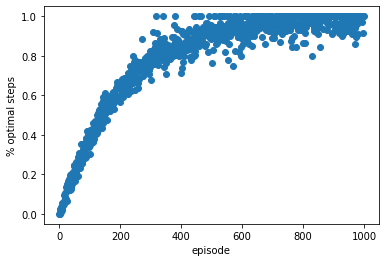

In [45]:
# Plot the percentage of optimal steps taken per episode
percentage_optimal_steps = optimal_step_count/total_step_count
plt.scatter(range(num_episodes), percentage_optimal_steps)
plt.ylabel('% optimal steps')
plt.xlabel('episode')

Text(0.5, 0, 'episode')

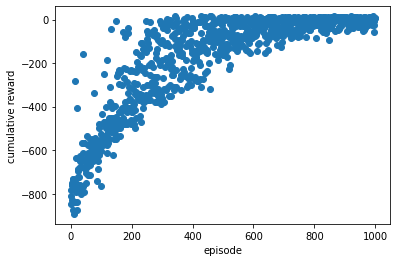

In [46]:
# Cumulative reward for each episode
plt.scatter(range(num_episodes), rewards_all_episodes)
plt.ylabel('cumulative reward')
plt.xlabel('episode')

Text(0.5, 0, 'episode')

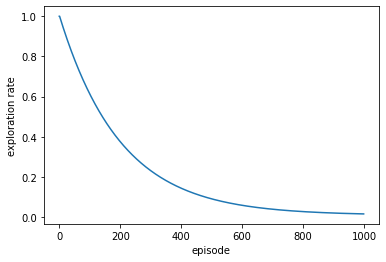

In [47]:
# Plot the learning rate per episode
plt.plot(exploration_rate_per_episode)
plt.ylabel('exploration rate')
plt.xlabel('episode')